In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [2]:
av = pd.read_csv('avocado.csv', index_col=0)

In [3]:
av.head()
# we need to find average price per day per region, since we have the same day for several cities in the same state
# how do we do that???? does it affect stationarity, how do we deal with it?

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
av.rename(columns={'4046':'small', '4225':'medium', '4770':'large'}, inplace=True)

In [5]:
av.drop(columns=['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], inplace=True)

In [6]:
av.shape

(18249, 9)

# creating date time object in date column

In [7]:
av['Date'] = pd.to_datetime(av['Date'], format='%Y-%m-%d')

In [8]:
av.head()

,Date,AveragePrice,Total Volume,small,medium,large,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [9]:
av.set_index('Date', inplace=True)

# simple EDA

In [10]:
# sns.pairplot(av)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1195854d0> (for post_execute):


KeyboardInterrupt: 

In [11]:
# Function to plot each feature vs target variable
def plot_features(df, features):
    pp_rows = [features[i:i+4] for i in range(0, len(features), 4)]
    for row in pp_rows:
        pp = sns.pairplot(data=df, x_vars=row, y_vars='AveragePrice', kind='reg', height=3)
    return plt.show()

features = av.drop(['type', 'year', 'region', 'Date'], axis=1).keys()
plot_features(av, features)

KeyError: "['Date'] not found in axis"

In [12]:
av.isnull().sum()

AveragePrice    0
Total Volume    0
small           0
medium          0
large           0
type            0
year            0
region          0
dtype: int64

region
Albany                 AxesSubplot(0.125,0.2;0.775x0.68)
Atlanta                AxesSubplot(0.125,0.2;0.775x0.68)
BaltimoreWashington    AxesSubplot(0.125,0.2;0.775x0.68)
Boise                  AxesSubplot(0.125,0.2;0.775x0.68)
Boston                 AxesSubplot(0.125,0.2;0.775x0.68)
BuffaloRochester       AxesSubplot(0.125,0.2;0.775x0.68)
California             AxesSubplot(0.125,0.2;0.775x0.68)
Charlotte              AxesSubplot(0.125,0.2;0.775x0.68)
Chicago                AxesSubplot(0.125,0.2;0.775x0.68)
CincinnatiDayton       AxesSubplot(0.125,0.2;0.775x0.68)
Columbus               AxesSubplot(0.125,0.2;0.775x0.68)
DallasFtWorth          AxesSubplot(0.125,0.2;0.775x0.68)
Denver                 AxesSubplot(0.125,0.2;0.775x0.68)
Detroit                AxesSubplot(0.125,0.2;0.775x0.68)
GrandRapids            AxesSubplot(0.125,0.2;0.775x0.68)
GreatLakes             AxesSubplot(0.125,0.2;0.775x0.68)
HarrisburgScranton     AxesSubplot(0.125,0.2;0.775x0.68)
HartfordSpringfield    A

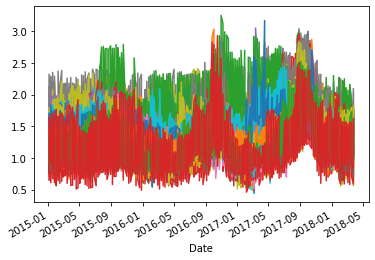

In [13]:
av.groupby('region')['AveragePrice'].plot()

NameError: name 'avocado' is not defined

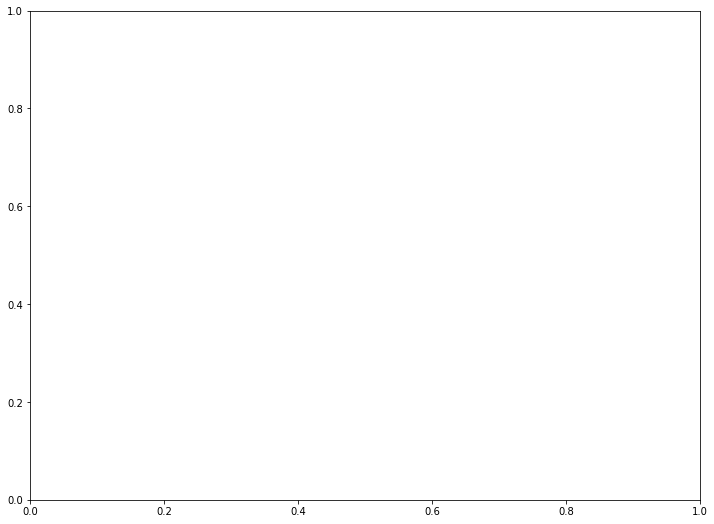

In [14]:
flatui = ['indianred','seagreen']

fig, ax = plt.subplots(figsize=(12,9))
ax = sns.barplot(x='year', y='AveragePrice', hue='type', data=avocado, palette=flatui)
ax.set_title('Average Price by Type per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')

plt.rc('axes', titlesize=20, )     # fontsize of the axes title
plt.rc('axes', labelsize= 20)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

In [ ]:
graph2 = avocado.groupby('region')['Total Volume'].sum().sort_values(ascending = False)
fig,ax = plt.subplots(figsize = (12,9))
ax = sns.barplot((graph2.values)/1000000, graph2.index)
ax.set_xlabel('Volume (in thousands)')
ax.set_ylabel('State Codes')
ax.set_title('Total Number of Avocados Purchased by State')

# removing regions and combining multiple cities into a single state

In [ ]:
av['region'].unique()

In [21]:
 stat = {'Albany':'NY', 'Atlanta':'GA', 'BaltimoreWashington':'MD', 'Boise':'ID','Boston':'MA',
         'BuffaloRochester':'NY', 'California':'CA', 'Charlotte':'NC', 'Chicago':'IL', 'Detroit':'MI',
         'GrandRapids':'MI', 'GreatLakes':'greatlakes', 'HarrisburgScranton':'PA', 'HartfordSpringfield': 'CT',
         'Houston':'TX', 'Indianapolis':'IN', 'Jacksonville':'FL', 'LasVegas':'NV', 'LosAngeles':'CA',
         'Louisville':'KY', 'MiamiFtLauderdale':'FL', 'Midsouth':'midsouth', 'Nashville':'TN',
         'NewOrleansMobile':'LA', 'NewYork':'NY', 'Northeast':'northeast',
         'NorthernNewEngland':'northernnewengland', 'Orlando':'FL', 'Philadelphia':'PA', 'PhoenixTucson':'AZ',
         'Pittsburgh':'PA', 'Plains':'plains', 'Portland':'OR', 'RaleighGreensboro':'NC', 
         'RichmondNorfolk':'VA', 'Roanoke':'VA', 'Sacramento':'CA', 'SanDiego':'CA', 'SanFrancisco':'CA',
         'Seattle':'WA', 'SouthCarolina':'SC', 'SouthCentral':'southcentral', 'Southeast':'southeast',
         'Spokane':'WA', 'StLouis':'MO', 'Syracuse':'NY', 'Tampa':'FL', 'TotalUS':'USA', 'West':'west', 
         'WestTexNewMexico':'NM', 'CincinnatiDayton':'OH', 'Columbus':'OH', 'DallasFtWorth':'TX', 'Denver':'CO'}

# northeast, midsouth, southeast, south central, west, great lakes, northern new england, totalUS


'''aggregate the west ourselves and see if the pre-made aggregated west region correctly represents the data'''

'aggregate the west ourselves and see if the pre-made aggregated west region correctly represents the data'

In [22]:
cities = list(set(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']) - set(['Northeast', 'Midsouth', 'Southeast', 'SouthCentral', 'West', 'GreatLakes', 'TotalUS', 'NorthernNewEngland', 'Plains']))


In [23]:
cities

['Orlando',
 'Charlotte',
 'Albany',
 'DallasFtWorth',
 'Philadelphia',
 'PhoenixTucson',
 'Houston',
 'Chicago',
 'LosAngeles',
 'Boise',
 'Sacramento',
 'Columbus',
 'SouthCarolina',
 'Atlanta',
 'CincinnatiDayton',
 'HartfordSpringfield',
 'MiamiFtLauderdale',
 'NewOrleansMobile',
 'Roanoke',
 'Tampa',
 'California',
 'BuffaloRochester',
 'Denver',
 'Seattle',
 'GrandRapids',
 'LasVegas',
 'Jacksonville',
 'Louisville',
 'StLouis',
 'HarrisburgScranton',
 'WestTexNewMexico',
 'RichmondNorfolk',
 'Detroit',
 'BaltimoreWashington',
 'Portland',
 'Nashville',
 'NewYork',
 'SanDiego',
 'SanFrancisco',
 'Spokane',
 'Boston',
 'Indianapolis',
 'RaleighGreensboro',
 'Syracuse',
 'Pittsburgh']

In [24]:
avocado = av[av['region'].isin(cities)].copy()

In [25]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15207 entries, 2015-12-27 to 2018-01-07
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  15207 non-null  float64
 1   Total Volume  15207 non-null  float64
 2   small         15207 non-null  float64
 3   medium        15207 non-null  float64
 4   large         15207 non-null  float64
 5   type          15207 non-null  object 
 6   year          15207 non-null  int64  
 7   region        15207 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.0+ MB


In [26]:
avocado

,AveragePrice,Total Volume,small,medium,large,type,year,region
Date,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico


In [27]:
avocado.shape

(15207, 8)

In [28]:
avocado.replace({'region':stat}, inplace=True)

In [29]:
avocado.groupby(['Date'])['AveragePrice'].mean()

Date
2015-01-04    1.302444
2015-01-11    1.374778
2015-01-18    1.397000
2015-01-25    1.401667
2015-02-01    1.247889
                ...   
2018-02-25    1.365000
2018-03-04    1.356333
2018-03-11    1.340111
2018-03-18    1.314222
2018-03-25    1.350778
Name: AveragePrice, Length: 169, dtype: float64

In [30]:
avocado.groupby('region')['Total Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
AZ,338.0,5.788264e+05,5.974847e+05,4881.79,11449.3575,339075.580,1.138581e+06,2200550.27
CA,1690.0,1.087375e+06,1.867886e+06,3562.52,22347.4175,251731.110,7.659474e+05,11213596.29
CO,338.0,4.109542e+05,3.940824e+05,6554.93,27517.2050,329377.845,7.663101e+05,1381528.74
CT,338.0,1.499128e+05,1.474348e+05,1494.63,8060.3800,111484.915,2.811244e+05,522565.33
FL,1352.0,1.857459e+05,2.258621e+05,84.56,3721.9050,53105.295,3.355664e+05,1310671.51
GA,338.0,2.621453e+05,2.631071e+05,3047.38,10989.8975,182673.440,4.907090e+05,957792.07
ID,338.0,4.264257e+04,4.247940e+04,562.64,2212.7675,28988.585,8.132399e+04,136377.55
IL,338.0,3.955690e+05,3.846002e+05,9910.84,29956.2450,231780.020,7.639302e+05,1802646.35
IN,338.0,8.953666e+04,8.911021e+04,964.25,3746.8175,60553.145,1.680288e+05,335442.41


# creating df for different types of avocados

In [31]:
conventional = avocado[avocado['type'] == 'conventional']
conventional.head()

,AveragePrice,Total Volume,small,medium,large,type,year,region
Date,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,NY
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,NY
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,NY
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,NY
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,NY


In [32]:
organic = avocado[avocado['type'] == 'organic']

In [33]:
organic.head()

,AveragePrice,Total Volume,small,medium,large,type,year,region
Date,,,,,,,,
2015-12-27,1.83,989.55,8.16,88.59,0.0,organic,2015,NY
2015-12-20,1.89,1163.03,30.24,172.14,0.0,organic,2015,NY
2015-12-13,1.85,995.96,10.44,178.70,0.0,organic,2015,NY
2015-12-06,1.84,1158.42,90.29,104.18,0.0,organic,2015,NY
2015-11-29,1.94,831.69,0.00,94.73,0.0,organic,2015,NY


In [34]:
conventional.groupby('Date')['AveragePrice'].mean()

Date
2015-01-04    1.014667
2015-01-11    1.119333
2015-01-18    1.144667
2015-01-25    1.124444
2015-02-01    0.966000
                ...   
2018-02-25    1.141333
2018-03-04    1.145778
2018-03-11    1.142889
2018-03-18    1.094222
2018-03-25    1.152222
Name: AveragePrice, Length: 169, dtype: float64

In [35]:
organic.groupby('Date')['AveragePrice'].mean()

Date
2015-01-04    1.590222
2015-01-11    1.630222
2015-01-18    1.649333
2015-01-25    1.678889
2015-02-01    1.529778
                ...   
2018-02-25    1.588667
2018-03-04    1.566889
2018-03-11    1.537333
2018-03-18    1.534222
2018-03-25    1.549333
Name: AveragePrice, Length: 169, dtype: float64

region
AZ    AxesSubplot(0.125,0.2;0.775x0.68)
CA    AxesSubplot(0.125,0.2;0.775x0.68)
CO    AxesSubplot(0.125,0.2;0.775x0.68)
CT    AxesSubplot(0.125,0.2;0.775x0.68)
FL    AxesSubplot(0.125,0.2;0.775x0.68)
GA    AxesSubplot(0.125,0.2;0.775x0.68)
ID    AxesSubplot(0.125,0.2;0.775x0.68)
IL    AxesSubplot(0.125,0.2;0.775x0.68)
IN    AxesSubplot(0.125,0.2;0.775x0.68)
KY    AxesSubplot(0.125,0.2;0.775x0.68)
LA    AxesSubplot(0.125,0.2;0.775x0.68)
MA    AxesSubplot(0.125,0.2;0.775x0.68)
MD    AxesSubplot(0.125,0.2;0.775x0.68)
MI    AxesSubplot(0.125,0.2;0.775x0.68)
MO    AxesSubplot(0.125,0.2;0.775x0.68)
NC    AxesSubplot(0.125,0.2;0.775x0.68)
NM    AxesSubplot(0.125,0.2;0.775x0.68)
NV    AxesSubplot(0.125,0.2;0.775x0.68)
NY    AxesSubplot(0.125,0.2;0.775x0.68)
OH    AxesSubplot(0.125,0.2;0.775x0.68)
OR    AxesSubplot(0.125,0.2;0.775x0.68)
PA    AxesSubplot(0.125,0.2;0.775x0.68)
SC    AxesSubplot(0.125,0.2;0.775x0.68)
TN    AxesSubplot(0.125,0.2;0.775x0.68)
TX    AxesSubplot(0.125,0.2;0.775

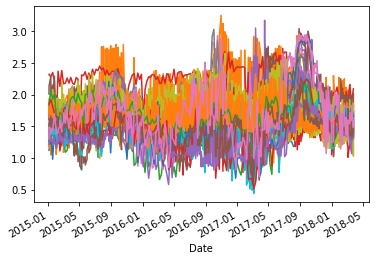

In [36]:
organic.groupby('region')['AveragePrice'].plot()

region
AZ    AxesSubplot(0.125,0.2;0.775x0.68)
CA    AxesSubplot(0.125,0.2;0.775x0.68)
CO    AxesSubplot(0.125,0.2;0.775x0.68)
CT    AxesSubplot(0.125,0.2;0.775x0.68)
FL    AxesSubplot(0.125,0.2;0.775x0.68)
GA    AxesSubplot(0.125,0.2;0.775x0.68)
ID    AxesSubplot(0.125,0.2;0.775x0.68)
IL    AxesSubplot(0.125,0.2;0.775x0.68)
IN    AxesSubplot(0.125,0.2;0.775x0.68)
KY    AxesSubplot(0.125,0.2;0.775x0.68)
LA    AxesSubplot(0.125,0.2;0.775x0.68)
MA    AxesSubplot(0.125,0.2;0.775x0.68)
MD    AxesSubplot(0.125,0.2;0.775x0.68)
MI    AxesSubplot(0.125,0.2;0.775x0.68)
MO    AxesSubplot(0.125,0.2;0.775x0.68)
NC    AxesSubplot(0.125,0.2;0.775x0.68)
NM    AxesSubplot(0.125,0.2;0.775x0.68)
NV    AxesSubplot(0.125,0.2;0.775x0.68)
NY    AxesSubplot(0.125,0.2;0.775x0.68)
OH    AxesSubplot(0.125,0.2;0.775x0.68)
OR    AxesSubplot(0.125,0.2;0.775x0.68)
PA    AxesSubplot(0.125,0.2;0.775x0.68)
SC    AxesSubplot(0.125,0.2;0.775x0.68)
TN    AxesSubplot(0.125,0.2;0.775x0.68)
TX    AxesSubplot(0.125,0.2;0.775

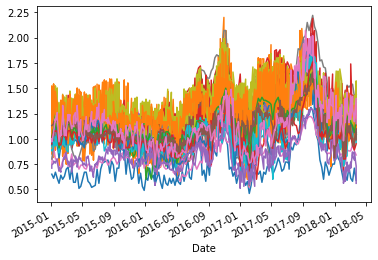

In [37]:
conventional.groupby('region')['AveragePrice'].plot()

In [38]:
table = pd.pivot_table(organic, values='AveragePrice', index=['Date', 'region'], aggfunc=np.mean)

In [34]:
table

AveragePrice
Date       region              
2015-01-04 az            1.1200
           ca            1.2460
           co            1.4200
           ct            2.3200
           fl            1.7825
...                         ...
2018-03-25 sc            1.3800
           tn            1.4800
           tx            1.3850
           va            1.5100
           wa            1.5350

[4560 rows x 1 columns]

In [69]:
for reg in stat.values():
    pivots = pd.DataFrame(columns=['Date', 'region', 'AveragePrice'])
    pivots = pivots.append(organic[organic.region == reg].pivot_table(values='AveragePrice', index=['Date', 'region'], aggfunc=np.mean))
    

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [72]:
pivots.reset_index()

,index,AveragePrice,Date,region
0,"(2015-01-04 00:00:00, co)",1.42,NaN,NaN
1,"(2015-01-11 00:00:00, co)",1.28,NaN,NaN
2,"(2015-01-18 00:00:00, co)",1.10,NaN,NaN
3,"(2015-01-25 00:00:00, co)",1.33,NaN,NaN
4,"(2015-02-01 00:00:00, co)",1.29,NaN,NaN
...,...,...,...,...
164,"(2018-02-25 00:00:00, co)",1.39,NaN,NaN
165,"(2018-03-04 00:00:00, co)",1.55,NaN,NaN
166,"(2018-03-11 00:00:00, co)",1.59,NaN,NaN
167,"(2018-03-18 00:00:00, co)",1.67,NaN,NaN


In [98]:
type(list(avocado['region'].unique()))

list

In [99]:
#  avocado['region'].unique() === array of state codes
empty = {}
for thing in list(avocado['region'].unique()):
    empty[thing] = organic[organic.region == thing].pivot_table(values=['AveragePrice'], index=['Date', 'region'], aggfunc=np.mean).reset_index(level=['region']).drop(columns='region')
    

In [104]:
empty.items()

dict_items([('ny',             AveragePrice
Date                    
2015-01-04        1.7925
2015-01-11        1.7625
2015-01-18        1.8725
2015-01-25        1.8200
2015-02-01        1.7400
...                  ...
2018-02-25        1.4625
2018-03-04        1.4925
2018-03-11        1.5225
2018-03-18        1.4300
2018-03-25        1.4100

[169 rows x 1 columns]), ('ga',             AveragePrice
Date                    
2015-01-04          1.76
2015-01-11          1.84
2015-01-18          1.86
2015-01-25          1.87
2015-02-01          1.44
...                  ...
2018-02-25          1.55
2018-03-04          1.66
2018-03-11          1.43
2018-03-18          1.48
2018-03-25          1.56

[169 rows x 1 columns]), ('md',             AveragePrice
Date                    
2015-01-04          1.29
2015-01-11          1.22
2015-01-18          1.41
2015-01-25          1.41
2015-02-01          1.15
...                  ...
2018-02-25          1.47
2018-03-04          1.43
2018-03-11     

# dickey fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
grrt = np.log(av['AveragePrice'])

In [ ]:
avocado['AveragePrice'].diff(periods=1)

In [ ]:
difference(av['AveragePrice'])

In [ ]:
test = adfuller((np.log(avocado['AveragePrice'])))
# test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

In [147]:
#conventional prices by date
conventional_by_date = conventional.groupby(['Date'])['AveragePrice'].mean()
conventional_final = (np.log(conventional_by_date)).diff(periods = 1)[1:]
#organic prices by date
organic_by_date = organic.groupby(['Date'])['AveragePrice'].mean()
organic_final = (np.log(organic_by_date)).diff(periods = 1)[1:]

In [148]:
conventional_final

Date
2015-01-11    0.098173
2015-01-18    0.022380
2015-01-25   -0.017824
2015-02-01   -0.151881
2015-02-08    0.072315
                ...   
2018-02-25   -0.029922
2018-03-04    0.003887
2018-03-11   -0.002525
2018-03-18   -0.043515
2018-03-25    0.051649
Name: AveragePrice, Length: 168, dtype: float64

In [115]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# conventional final

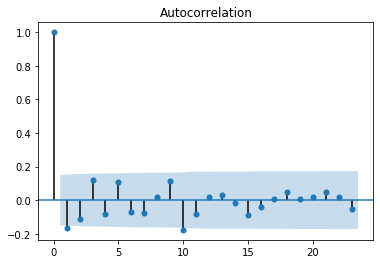

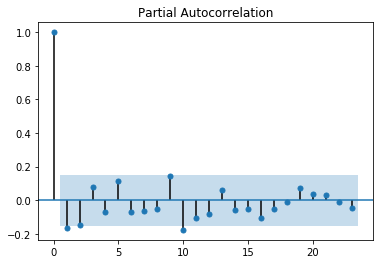

In [154]:
plot_acf(conventional_final)
plot_pacf(conventional_final)
plt.show()

# organic final

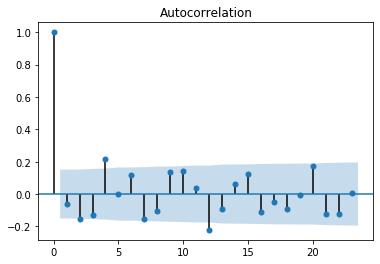

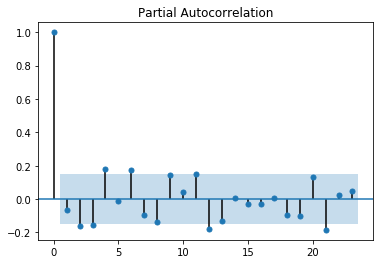

In [156]:
plot_acf(organic_final)
plot_pacf(organic_final)
plt.show()

# ARIMA (organic)

In [176]:
organic_final

Date
2015-01-11    0.024843
2015-01-18    0.011655
2015-01-25    0.017761
2015-02-01   -0.093010
2015-02-08    0.039589
                ...   
2018-02-25    0.001960
2018-03-04   -0.013803
2018-03-11   -0.019043
2018-03-18   -0.002026
2018-03-25    0.009801
Name: AveragePrice, Length: 168, dtype: float64

In [189]:
# dict of arima models for organic
results = {}
for x in [3,4,5,7,13,22,6]:
    for y in [5,13,2]:
        try:
            results[(x,1,y)] = ARIMA(organic['AveragePrice'], order = (x,1,y)).fit(disp=0).summary()
        except ValueError:
            continue

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecastin

In [192]:
results
#  best order == (4,1,5)

{(3, 1, 5): <class 'statsmodels.iolib.summary.Summary'>
 """
                              ARIMA Model Results                              
 Dep. Variable:         D.AveragePrice   No. Observations:                 7601
 Model:                 ARIMA(3, 1, 5)   Log Likelihood                1309.234
 Method:                       css-mle   S.D. of innovations              0.204
 Date:                Tue, 16 Jun 2020   AIC                          -2598.467
 Time:                        10:55:33   BIC                          -2529.107
 Sample:                             1   HQIC                         -2574.666
                                                                               
                            coef    std err          z      P>|z|      [0.025      0.975]
 ----------------------------------------------------------------------------------------
 const                 9.569e-06   1.03e-05      0.930      0.353   -1.06e-05    2.97e-05
 ar.L1.D.AveragePrice     0.0

# ARIMA (conventional)

In [193]:
#  dict of arima models for conventional
results_c = {}
for x in [2,3,11]:
    for y in [2,11]:
        try:
            results_c[(x,1,y)] = ARIMA(conventional['AveragePrice'], order = (x,1,y)).fit(disp=0).summary()
        except ValueError:
            continue

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has

In [194]:
results_c
# best order == (3,1,2)

{(2, 1, 2): <class 'statsmodels.iolib.summary.Summary'>
 """
                              ARIMA Model Results                              
 Dep. Variable:         D.AveragePrice   No. Observations:                 7604
 Model:                 ARIMA(2, 1, 2)   Log Likelihood                4483.001
 Method:                       css-mle   S.D. of innovations              0.134
 Date:                Tue, 16 Jun 2020   AIC                          -8954.003
 Time:                        13:08:22   BIC                          -8912.384
 Sample:                             1   HQIC                         -8939.721
                                                                               
                            coef    std err          z      P>|z|      [0.025      0.975]
 ----------------------------------------------------------------------------------------
 const                -5.329e-05      0.001     -0.055      0.956      -0.002       0.002
 ar.L1.D.AveragePrice    -0.2

In [41]:
model_org = ARIMA(organic['AveragePrice'], order=(4,1,5))
model_org_fit = model_org.fit(disp=0)
# print(model_fit.summary())
# model_org_fit.plot_predict()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

KeyboardInterrupt: 

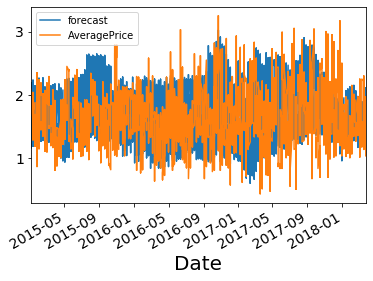

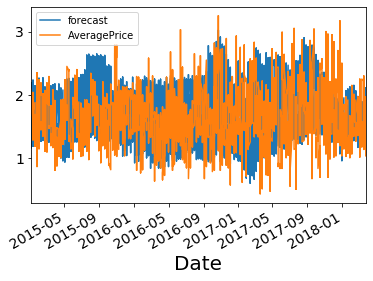

In [290]:
model_org_fit.plot_predict()

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


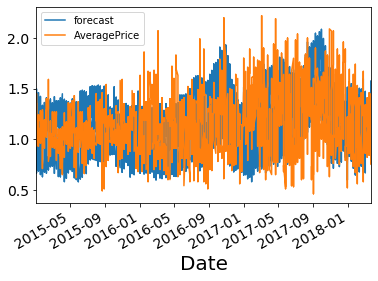

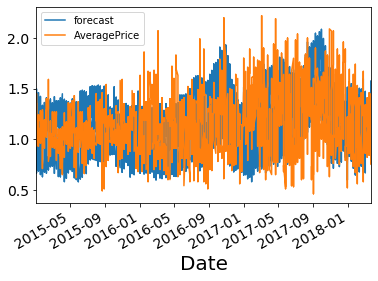

In [289]:
model_con = ARIMA(conventional['AveragePrice'], order=(3,1,2))
model_con_fit = model_con.fit(disp=0)
# print(model_fit.summary())
# model_con_fit.plot_predict()

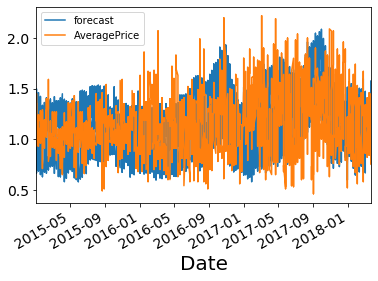

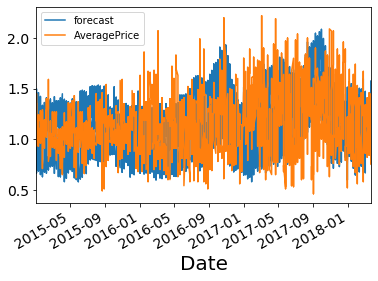

In [291]:
model_con_fit.plot_predict()

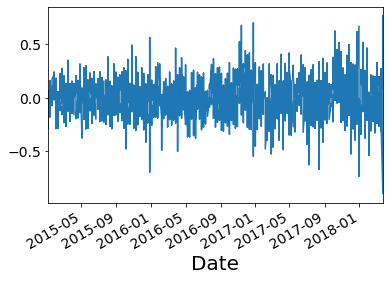

In [294]:
model_con_fit.resid.plot()

---

In [76]:
organic_pivot = pd.pivot_table(organic, values='AveragePrice', index=['Date'], aggfunc=np.mean)

In [80]:
conventional_pivot = pd.pivot_table(conventional, values='AveragePrice', index=['Date'], aggfunc=np.mean)

In [42]:
from sklearn.model_selection import TimeSeriesSplit


In [47]:
organic['AveragePrice'].index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=7602, freq=None)

,AveragePrice,Total Volume,small,medium,large,type,year,region
Date,,,,,,,,
2015-12-27,1.83,989.55,8.16,88.59,0.0,organic,2015,NY
2015-12-20,1.89,1163.03,30.24,172.14,0.0,organic,2015,NY
2015-12-13,1.85,995.96,10.44,178.70,0.0,organic,2015,NY
2015-12-06,1.84,1158.42,90.29,104.18,0.0,organic,2015,NY
2015-11-29,1.94,831.69,0.00,94.73,0.0,organic,2015,NY


In [46]:
organic['AveragePrice'].values


array([1.83, 1.89, 1.85, ..., 1.87, 1.93, 1.62])

# Train test Split

In [85]:
tss = TimeSeriesSplit(n_splits = 2)
 #= tss(x = organic['AveragePrice'].index, y = organic['AveragePrice'])

In [86]:
X_org = organic_pivot['AveragePrice'].index
y_org = organic_pivot['AveragePrice']

for train_index, test_index in tss.split(X_org):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_org_train, X_org_test = X_org[train_index], X_org[test_index]
    y_org_train, y_org_test = y_org[train_index], y_org[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56] TEST: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112] TEST: [113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 

In [93]:
X_org_train

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
               '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
               '2015-03-01', '2015-03-08',
               ...
               '2016-12-25', '2017-01-01', '2017-01-08', '2017-01-15',
               '2017-01-22', '2017-01-29', '2017-02-05', '2017-02-12',
               '2017-02-19', '2017-02-26'],
              dtype='datetime64[ns]', name='Date', length=113, freq=None)

In [82]:
X_con = conventional_pivot['AveragePrice'].index
y_con = conventional_pivot['AveragePrice']

for train_index, test_index in tss.split(X_con):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_con_train, X_con_test = X_con[train_index], X_con[test_index]
    y_con_train, y_con_test = y_con[train_index], y_con[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56] TEST: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112] TEST: [113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 

In [154]:
org_train = pd.DataFrame(y_org_train, index = X_org_train)
con_train = pd.DataFrame(y_con_train, index = X_con_train)

org_test = pd.DataFrame(y_org_test, index = X_org_test)
con_test = pd.DataFrame(y_con_test, index = X_con_test)

# Arima

## Organic

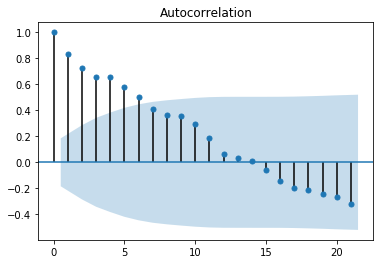

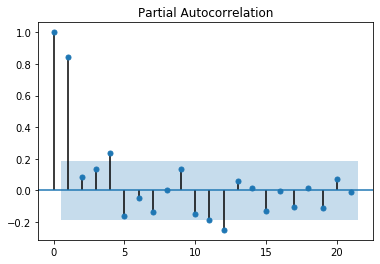

In [98]:
plot_acf(org_train)
plot_pacf(org_train)
plt.show()
#p = (2,5,13)
#q = 2 -> 7 might only have to use 7

In [ ]:
models.selection rather than models_selection

In [125]:
#  dict of arima models for organic
results_o = {}
for x in [2,5,13]:
    for y in [2,7]:
        try:
            results_o[(x,1,y)] = ARIMA(org_train['AveragePrice'], order = (x,1,y)).fit(disp = 0).summary()
        except ValueError:
            continue

#2,1,2 is the juice

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarn

In [126]:
results_o

{(2,
  1,
  2): <class 'statsmodels.iolib.summary.Summary'>
 """
                              ARIMA Model Results                              
 Dep. Variable:         D.AveragePrice   No. Observations:                  112
 Model:                 ARIMA(2, 1, 2)   Log Likelihood                 153.988
 Method:                       css-mle   S.D. of innovations              0.061
 Date:                Tue, 16 Jun 2020   AIC                           -295.976
 Time:                        19:08:09   BIC                           -279.665
 Sample:                    01-11-2015   HQIC                          -289.358
                          - 02-26-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
 ----------------------------------------------------------------------------------------
 const                   -0.0017      0.005     -0.342      0.732      -0.011       0.008
 ar.L1.D.AveragePrice    

In [120]:
#results_c_COPY = results_c.copy()

In [123]:
results_c_COPY

{(2,
  1,
  2): <class 'statsmodels.iolib.summary.Summary'>
 """
                              ARIMA Model Results                              
 Dep. Variable:         D.AveragePrice   No. Observations:                  112
 Model:                 ARIMA(2, 1, 2)   Log Likelihood                 153.988
 Method:                       css-mle   S.D. of innovations              0.061
 Date:                Tue, 16 Jun 2020   AIC                           -295.976
 Time:                        17:25:20   BIC                           -279.665
 Sample:                    01-11-2015   HQIC                          -289.358
                          - 02-26-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
 ----------------------------------------------------------------------------------------
 const                   -0.0017      0.005     -0.342      0.732      -0.011       0.008
 ar.L1.D.AveragePrice    

In [ ]:
model.plot_predict()

## conventional

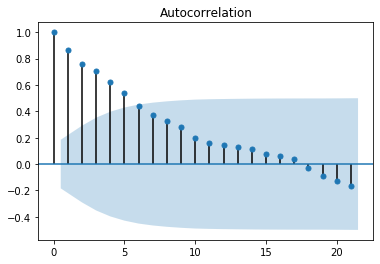

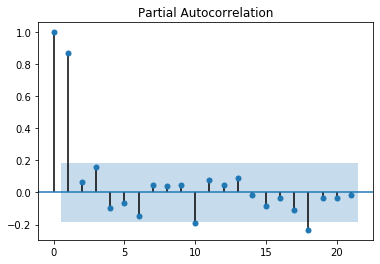

In [99]:
plot_acf(con_train)
plot_pacf(con_train)
plt.show()
#p = (2,19)
#q = 2 -> 6 might only have to use 6

In [121]:
results_c = {}
for x in [2,19]:
    for y in range(2,7):
        try:
            results_c[(x,1,y)] = ARIMA(con_train, order = (x,1,y)).fit(disp=0).summary()
        except ValueError:
            continue

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarn

In [122]:
results_c

{(2,
  1,
  2): <class 'statsmodels.iolib.summary.Summary'>
 """
                              ARIMA Model Results                              
 Dep. Variable:         D.AveragePrice   No. Observations:                  112
 Model:                 ARIMA(2, 1, 2)   Log Likelihood                 163.412
 Method:                       css-mle   S.D. of innovations              0.055
 Date:                Tue, 16 Jun 2020   AIC                           -314.823
 Time:                        17:35:55   BIC                           -298.512
 Sample:                    01-11-2015   HQIC                          -308.205
                          - 02-26-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
 ----------------------------------------------------------------------------------------
 const                    0.0004      0.005      0.085      0.932      -0.009       0.010
 ar.L1.D.AveragePrice    

# final results

In [128]:
org_model = ARIMA(org_train['AveragePrice'], order = (2,1,2)).fit(disp = 0)
print(org_model.summary())

con_model = ARIMA(con_train['AveragePrice'], order = (2,1,2)).fit(disp = 0)
print(con_model.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.AveragePrice   No. Observations:                  112
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 153.988
Method:                       css-mle   S.D. of innovations              0.061
Date:                Tue, 16 Jun 2020   AIC                           -295.976
Time:                        19:18:58   BIC                           -279.665
Sample:                    01-11-2015   HQIC                          -289.358
                         - 02-26-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0017      0.005     -0.342      0.732      -0.011       0.008
ar.L1.D.AveragePrice     0.5803      0.075      7.727      0.000       0.433       0.727
ar.L2.D.Aver

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.AveragePrice   No. Observations:                  112
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 153.988
Method:                       css-mle   S.D. of innovations              0.061
Date:                Tue, 16 Jun 2020   AIC                           -295.976
Time:                        19:19:00   BIC                           -279.665
Sample:                    01-11-2015   HQIC                          -289.358
                         - 02-26-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0017      0.005     -0.342      0.732      -0.011       0.008
ar.L1.D.AveragePrice     0.5803      0.075      7.727      0.000       0.433       0.727
ar.L2.D.Aver

In [174]:
np.sqrt((org_model.resid**2).mean()) #this is for the plot_predict()

0.06114256225132847

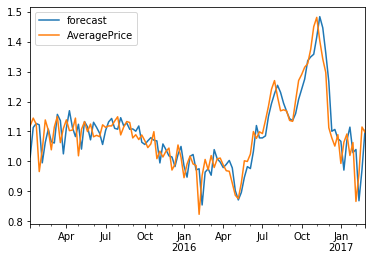

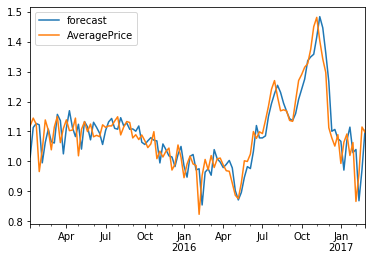

In [136]:
con_model.plot_predict()

In [145]:
len(X_con_train)

113

In [141]:
len(X_con_test)

56

In [146]:
len(conventional_pivot)

169

In [152]:
X_con_test

DatetimeIndex(['2017-03-05', '2017-03-12', '2017-03-19', '2017-03-26',
               '2017-04-02', '2017-04-09', '2017-04-16', '2017-04-23',
               '2017-04-30', '2017-05-07', '2017-05-14', '2017-05-21',
               '2017-05-28', '2017-06-04', '2017-06-11', '2017-06-18',
               '2017-06-25', '2017-07-02', '2017-07-09', '2017-07-16',
               '2017-07-23', '2017-07-30', '2017-08-06', '2017-08-13',
               '2017-08-20', '2017-08-27', '2017-09-03', '2017-09-10',
               '2017-09-17', '2017-09-24', '2017-10-01', '2017-10-08',
               '2017-10-15', '2017-10-22', '2017-10-29', '2017-11-05',
               '2017-11-12', '2017-11-19', '2017-11-26', '2017-12-03',
               '2017-12-10', '2017-12-17', '2017-12-24', '2017-12-31',
               '2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25',
               '2018-03-04', '2018-03-11', '2018-03-18', '2018-03-25'],
     

# conventional predictions

In [158]:
con_pred = con_model.forecast(56)[0]

In [151]:
y_con_test.values

array([1.19977778, 1.31955556, 1.33377778, 1.33377778, 1.33777778,
       1.31155556, 1.33244444, 1.308     , 1.28      , 1.16822222,
       1.28622222, 1.32533333, 1.348     , 1.33866667, 1.30577778,
       1.27444444, 1.23155556, 1.26333333, 1.23333333, 1.37066667,
       1.36333333, 1.37222222, 1.37866667, 1.41111111, 1.47088889,
       1.50911111, 1.61733333, 1.61644444, 1.60866667, 1.65644444,
       1.702     , 1.71244444, 1.62444444, 1.50222222, 1.34755556,
       1.28022222, 1.22977778, 1.25155556, 1.30288889, 1.15177778,
       1.09133333, 1.15266667, 1.25222222, 1.03688889, 1.17977778,
       1.26266667, 1.11955556, 1.17844444, 0.92711111, 1.05311111,
       1.176     , 1.14133333, 1.14577778, 1.14288889, 1.09422222,
       1.15222222])

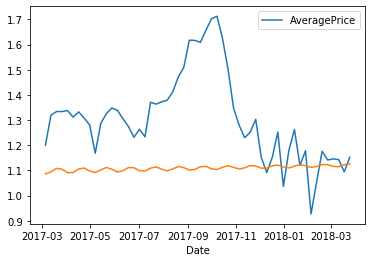

In [162]:
fig, ax = plt.subplots()
ax1 = sns.lineplot(data = con_test)
ax2 = sns.lineplot(x = X_con_test, y = con_pred)

In [175]:
con_error = con_pred - y_con_test

In [177]:
np.sqrt((con_error**2).mean())

0.2621067858951772

# Organic predictions

In [163]:
org_pred = org_model.forecast(56)[0]

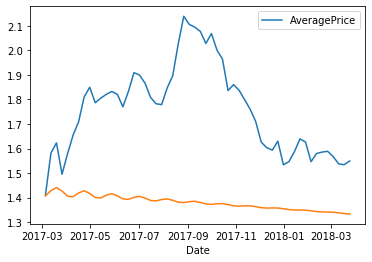

In [164]:
fig, ax = plt.subplots()
ax1 = sns.lineplot(data = org_test)
ax2 = sns.lineplot(x = X_org_test, y = org_pred)
# to find error, just difference and root mean square

In [178]:
org_error = org_pred - y_org_test

In [179]:
np.sqrt((org_error**2).mean())

0.4150199664453139

# Questions to ask Matt and Natalie or FangFang
1. Please look over our code and see if we are missing anything or did stuff out of order
2. From our results, why are they so different? Is it because we just did a bad job :'(

# scrap area

In [166]:
con_pred_df = pd.DataFrame(con_pred,index = X_con_test)

In [167]:
con_test_copy = con_test.copy

In [169]:
test_df_scrap = pd.concat([con_test_copy,con_pred_df])
sns.lineplot(test_df_scrap)

TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid